In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import imread
#from detectBlobs import detectBlobs
from drawBlobs import drawBlobs
import numpy as np
#import cv2
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_laplace
from scipy.ndimage.filters import convolve, generic_filter
%matplotlib inline

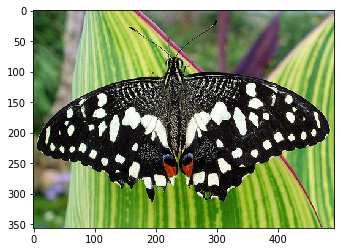

In [3]:
imageName = 'butterfly.jpg'
numBlobsToDraw = 500
imName = imageName.split('.')[0]
datadir = os.path.join('..', 'data', 'blobs')
im = imread(os.path.join(datadir, imageName))
plt.imshow(im, cmap='gray')
# BLOBS - n x 5 array with blob in each row in (x, y, radius, angle, score)
blobs = np.array([im.shape[1]/2, im.shape[0]/2, 100, 1.0])

In [4]:
import sys
def py_im2double(img):
    original_img = img.astype('float')
    img_min, img_max = np.min(im.ravel()), np.max(im.ravel())
    return (original_img - img_min) / (img_max - img_min)

# def fspecial(shape=(3,3),sigma=0.5):
#     """
#     2D gaussian mask - should give the same result as MATLAB's
#     fspecial('gaussian',[shape],[sigma])
#     """
#     m,n = [(ss-1.)/2. for ss in shape]
#     y,x = np.ogrid[-m:m+1,-n:n+1]
#     h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
#     h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
#     sumh = h.sum()
#     if sumh != 0:
#         h /= sumh
#     return h

def fspecial_log(p2, std):
    siz = int((p2-1)/2)
    x = y = np.linspace(-siz, siz, 2*siz+1)
    x, y = np.meshgrid(x, y)
    arg = -(x**2 + y**2) / (2*std**2)
    h = np.exp(arg)
    h[h < sys.float_info.epsilon * h.max()] = 0
    h = h/h.sum() if h.sum() != 0 else h
    h1 = h*(x**2 + y**2 - 2*std**2) / (std**4)
    return h1 - h1.mean()

In [5]:
processed_im = py_im2double(rgb2gray(im))
sigma = 1.7 #1.6
k = np.sqrt(2) #initial_scale
scale = 1.2
n_iterations = 10
n = 10 #10-15
threshold = 0.2
h, w = processed_im.shape
scale_space = np.zeros((h, w, n))

In [6]:
# Build a Laplacian scale space, starting with some initial scale and going for n iterations
from scipy.ndimage import gaussian_laplace
for i in range(n):
    sigma_i = np.power(k, i-1) * sigma
    print ("Sigma Value = {}".format(sigma_i))
    filtered_im = gaussian_laplace(processed_im, sigma=sigma_i) ** 2
    scale_space[:, :, i] = filtered_im

In [ ]:
# # Perform non-maximum suppression in scale space
# max_space = np.zeros((h, w, n))
# suppression_size = 3
# for i in range(n): 
#     R = scale_space[:, :, i]
#     Rmax = generic_filter(R, np.max, footprint=np.ones((3, 3)) )
#     max_space[:, :, i] = Rmax
#     #Rmax[Rmax != R] = 0 #Suppression of Non-max
#     #v = Rmax[Rmax != 0]
#     #x, y = np.nonzero(Rmax)

In [7]:
max_space = np.zeros((h, w, n))
suppression_size = 3
for i in range(n):
    R = scale_space[:, :, i]
    Rmax = generic_filter(R, np.max, footprint=np.ones((3, 3)) )
    print (np.maximum(i-1, 0), np.minimum(i+1,n))
    print (Rmax[:, np.maximum(i-1, 0):np.minimum(i+1,n)])
    k = np.maximum(Rmax[:, np.maximum(i-1, 0):np.minimum(i+1,n)]) 
    print (k)
    #maxSpace(:,:,max(i-1,1):min(i+1,n)),[],3)

0 1
[[7.06820940e-05]
 [1.83930900e-04]
 [2.15547406e-04]
 [2.15547406e-04]
 [2.15547406e-04]
 [8.64699157e-05]
 [8.76325156e-05]
 [1.09138281e-04]
 [1.09138281e-04]
 [1.32352291e-04]
 [1.86739126e-04]
 [1.86739126e-04]
 [1.86739126e-04]
 [1.25998900e-04]
 [7.81906503e-05]
 [8.02811534e-05]
 [8.02811534e-05]
 [8.02811534e-05]
 [9.66993910e-05]
 [9.66993910e-05]
 [9.66993910e-05]
 [9.09917944e-05]
 [3.11804911e-05]
 [5.72834837e-06]
 [4.13765485e-05]
 [4.41554172e-05]
 [6.60682459e-05]
 [1.37358529e-04]
 [1.37358529e-04]
 [5.22162766e-04]
 [5.38537119e-04]
 [5.38537119e-04]
 [5.38537119e-04]
 [1.53299098e-04]
 [6.72367453e-05]
 [1.26925794e-04]
 [1.44725044e-04]
 [1.44725044e-04]
 [1.44725044e-04]
 [9.94691406e-05]
 [9.94691406e-05]
 [9.94691406e-05]
 [1.91638983e-04]
 [3.79230884e-04]
 [3.79230884e-04]
 [3.79230884e-04]
 [1.67671462e-04]
 [6.88861088e-05]
 [3.45875187e-05]
 [2.25494621e-04]
 [4.94714891e-04]
 [4.94714891e-04]
 [4.94714891e-04]
 [2.30511186e-04]
 [7.22795834e-05]
 [7.49

ValueError: invalid number of arguments

In [ ]:
# Perform non-maximum suppression in scale space
max_space = np.zeros((h, w, n))
suppression_size = 3
for i in range(n): 
    R = scale_space[:, :, i]
    Rmax = generic_filter(R, np.max, footprint=np.ones((3, 3)) )
    max_space[:, :, i] = Rmax
#     Rmax[Rmax != R] = 0 #Suppression of Non-max
#     #v = Rmax[Rmax != 0]
#     #print (np.nonzero(Rmax))
#     #max_space[:, :, i] = np.nonzero(Rmax)
#     x, y = np.nonzero(Rmax)

In [ ]:
for i in range(n):
    x = (max_space[:, :, i] * max_space[:, :, i])
    print (x)

In [ ]:
# non-maximum suppression between scales and threshold
for i in range(n):
    max_space[:, :, i] = np.amax(max_space[:, :, i], 0)

In [9]:
x, y, radius, value = [], [], [], []
for i in range(n):
    rows, cols = np.where(np.matmul(max_space[:, :, i], max_space[:, :, i].T) > threshold)

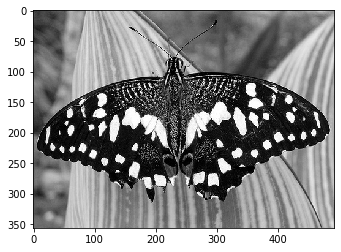

In [8]:
drawBlobs(im, max_space, threshold)

In [ ]:
max_space[:, :, 0].shape

In [ ]:
maxSpace(:,:,i) = max(maxSpace(:,:,max(i-1,1):min(i+1,n)),[],3)

In [ ]:
# non-maxima suppression within 3x3 windows
    Rmax = gf(R, np.max, footprint=np.ones((3, 3)))
    Rmax[Rmax != R] = 0  # suppress non-max
    v = Rmax[Rmax != 0]
    x, y = np.nonzero(Rmax)